# Finance Statement and Time-series Analysis

Summary dataset: <br>

1. The dataset gives information about sales of chain store in Vietnam 

2. The dataset reveals sales in just first quarter of the year (we don't need consider about how changing between quarters)

3. And the last information, this is the financial statement. So the first idea is we need figure out the revenue between stores, region and store's category.

First, we need import some package and dataset

In [1]:
# Basic package
import pandas as pd
import numpy as np

# Visualization pacakage
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import plotly.express as px

# Other package
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import datatset
df = pd.read_excel("D:/University/Các cuộc thi/G'Contest/Round 2/Data/GCONTEST2023-DATA-VÒNG-2.xlsx")

In [3]:
df.head()

,KHU VỰC,CHI NHÁNH,Mã TT,Tháng,NĂM,Quý,Mảng KD,Hình thức bán hàng,Tổng Doanh thu,Các khoản giảm trừ DT,...,Lợi nhuận thuần từ hoạt động tài chính,Thu nhập khác,Chi phí khác,Lợi nhuận khác,Tổng lợi nhuận trước thuế,Chi phí thuế TNDN,Lợi nhuận sau thuế,Lợi nhuận NET,Kế hoạch DTT,Kế hoạch LNN
0,MIỀN BẮC,Hà Nội,101101,1,2022,1,Thời trang nam,BÁN SỈ,7.166070e+10,0.0,...,-6.248987e+06,1.271546e+07,11265166.0,1450290.000,1.432752e+07,0,1.432752e+07,1.432752e+07,6.960000e+10,11600000.0
1,MIỀN BẮC,Hà Nội,101101,2,2022,1,Thời trang nam,BÁN SỈ,7.943241e+10,0.0,...,-1.240463e+07,5.353740e+06,6298292.0,-944552.000,1.769942e+07,0,1.769942e+07,1.769942e+07,7.840000e+10,16240000.0
2,MIỀN BẮC,Hà Nội,101101,3,2023,1,Thời trang nam,BÁN SỈ,8.658796e+10,0.0,...,-9.104703e+05,1.334922e+07,15553450.0,-2204225.000,6.376336e+07,0,6.376336e+07,6.376336e+07,8.658796e+10,62500000.0
3,MIỀN BẮC,Hà Nội,101101,1,2023,1,Thời trang nam,BÁN SỈ,9.287366e+10,0.0,...,-3.127841e+07,1.613964e+06,0.0,1613964.000,6.743102e+07,0,6.743102e+07,6.743102e+07,1.927993e+11,66000000.0
4,MIỀN BẮC,Hà Nội,101101,3,2022,1,Thời trang nam,BÁN SỈ,1.033487e+11,0.0,...,4.895374e+07,3.373421e+06,0.0,3373421.004,7.970568e+07,0,7.970568e+07,7.970568e+07,5.760000e+10,77616000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   KHU VỰC                                    1218 non-null   object 
 1   CHI NHÁNH                                  1218 non-null   object 
 2   Mã TT                                      1218 non-null   int64  
 3   Tháng                                      1218 non-null   int64  
 4   NĂM                                        1218 non-null   int64  
 5   Quý                                        1218 non-null   int64  
 6   Mảng KD                                    1218 non-null   object 
 7   Hình thức bán hàng                         1218 non-null   object 
 8   Tổng Doanh thu                             1218 non-null   float64
 9   Các khoản giảm trừ DT                      1218 non-null   float64
 10  Doanh thu thuần         

In [5]:
df.describe()

,Mã TT,Tháng,NĂM,Quý,Tổng Doanh thu,Các khoản giảm trừ DT,Doanh thu thuần,Giá vốn,Lợi nhuận gộp,Chi phí bán hàng,...,Lợi nhuận thuần từ hoạt động tài chính,Thu nhập khác,Chi phí khác,Lợi nhuận khác,Tổng lợi nhuận trước thuế,Chi phí thuế TNDN,Lợi nhuận sau thuế,Lợi nhuận NET,Kế hoạch DTT,Kế hoạch LNN
count,1218.000000,1218.000000,1218.000000,1218.0,1.218000e+03,1.218000e+03,1.218000e+03,1.218000e+03,1.218000e+03,1.218000e+03,...,1.218000e+03,1.218000e+03,1.218000e+03,1.218000e+03,1.218000e+03,1218.0,1.218000e+03,1.218000e+03,1.218000e+03,1.218000e+03
mean,229909.382594,1.998358,2022.596059,1.0,6.414269e+08,2.894392e+05,6.411375e+08,6.388505e+08,2.286999e+06,1.489092e+06,...,-1.589269e+05,1.074251e+05,5.187306e+04,5.555206e+04,6.157235e+05,0.0,6.884355e+05,6.806815e+05,7.574849e+08,7.453609e+05
std,94994.635646,0.818840,0.490887,0.0,6.743317e+09,1.294700e+06,6.743341e+09,6.737856e+09,8.154799e+06,3.345518e+06,...,1.776439e+06,1.149166e+06,5.921274e+05,1.022997e+06,5.425180e+06,0.0,5.507284e+06,5.462634e+06,8.046839e+09,4.993450e+06
min,101101.000000,1.000000,2022.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.709600e+05,0.000000e+00,...,-3.127841e+07,0.000000e+00,-1.428300e+05,-2.204225e+06,-7.615303e+06,0.0,-7.615303e+06,-7.615303e+06,0.000000e+00,-4.984159e+06
25%,105101.000000,1.000000,2022.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.281082e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.860291e+05,0.0,-1.697957e+05,-1.697957e+05,0.000000e+00,0.000000e+00
50%,311102.000000,2.000000,2023.000000,1.0,7.600276e+05,0.000000e+00,7.378239e+05,4.540368e+05,1.090516e+05,2.415353e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.400000e+05,0.000000e+00
75%,312112.000000,3.000000,2023.000000,1.0,1.976273e+07,7.144275e+04,1.883454e+07,1.411016e+07,1.429504e+06,1.440547e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.661171e+04,0.0,6.026233e+04,6.026233e+04,2.200000e+07,6.787500e+04
max,312301.000000,3.000000,2023.000000,1.0,1.282958e+11,2.549992e+07,1.282958e+11,1.281838e+11,1.391112e+08,4.201569e+07,...,4.895374e+07,2.092764e+07,1.555345e+07,2.092764e+07,9.151091e+07,0.0,9.151091e+07,9.151091e+07,1.927993e+11,9.000000e+07


In [21]:
# columns in this dataset
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['KHUVỰC', 'CHINHÁNH', 'MãTT', 'Tháng', 'NĂM', 'Quý', 'MảngKD',
       'Hìnhthứcbánhàng', 'TổngDoanhthu', 'CáckhoảngiảmtrừDT', 'Doanhthuthuần',
       'Giávốn', 'Lợinhuậngộp', 'Chiphíbánhàng', 'Thuênhà,CPđịađiểm',
       'KhấuhaoTSCĐ', 'Lương+Ănca+Cáckhoảntríchtheolương', 'Thưởngcácloại',
       'Chiphímarketing', 'Thuế(GTGT+TTDB)', 'Cáckhoảnchiphíchung',
       'Chiphíquảnlý(phânbổ)', 'Lợinhuậnthuầntừhoạtđộngkinhdoanh',
       'Doanhthuhoạtđộngtàichính', 'Chiphíhoạtđộngtàichính',
       'Lợinhuậnthuầntừhoạtđộngtàichính', 'Thunhậpkhác', 'Chiphíkhác',
       'Lợinhuậnkhác', 'Tổnglợinhuậntrướcthuế', 'ChiphíthuếTNDN',
       'Lợinhuậnsauthuế', 'LợinhuậnNET', 'KếhoạchDTT', 'KếhoạchLNN'],
      dtype='object')

## Check duplicate data


In [22]:
subsets = []
for i in df.columns:
    subsets.append(i)

print('Number of rows before drop duplicate: %s' %len(df))
plt.figure(figsize=(10,10))
df.drop_duplicates(subset=subsets, keep=False)
print('number of rows after drop duplicate: %s' %len(df))



Number of rows before drop duplicate: 1218
number of rows after drop duplicate: 1218


<Figure size 720x720 with 0 Axes>

## Check data types


In [23]:
numeric = []
category = []

for i in df.columns:
    if df[i].dtypes == 'object':
        category.append(i)
    else:
        numeric.append(i)

print(category)
print(numeric)

['KHUVỰC', 'CHINHÁNH', 'MảngKD', 'Hìnhthứcbánhàng']
['MãTT', 'Tháng', 'NĂM', 'Quý', 'TổngDoanhthu', 'CáckhoảngiảmtrừDT', 'Doanhthuthuần', 'Giávốn', 'Lợinhuậngộp', 'Chiphíbánhàng', 'Thuênhà,CPđịađiểm', 'KhấuhaoTSCĐ', 'Lương+Ănca+Cáckhoảntríchtheolương', 'Thưởngcácloại', 'Chiphímarketing', 'Thuế(GTGT+TTDB)', 'Cáckhoảnchiphíchung', 'Chiphíquảnlý(phânbổ)', 'Lợinhuậnthuầntừhoạtđộngkinhdoanh', 'Doanhthuhoạtđộngtàichính', 'Chiphíhoạtđộngtàichính', 'Lợinhuậnthuầntừhoạtđộngtàichính', 'Thunhậpkhác', 'Chiphíkhác', 'Lợinhuậnkhác', 'Tổnglợinhuậntrướcthuế', 'ChiphíthuếTNDN', 'Lợinhuậnsauthuế', 'LợinhuậnNET', 'KếhoạchDTT', 'KếhoạchLNN']


## Replace some value

In [52]:
df['CHINHÁNH'] = df['CHINHÁNH'].str.replace('CN', '').str.replace('Tầu','Tàu').astype(object)

## Check missing value

In [53]:
def missing_value_table(df):

    # create missing column
    missing_value = df.isna().sum()

    # create percentage missing column
    percentage_missing = 100 * df.isna().sum() / len(df)

    # concat 2 columns
    table_1 = pd.concat([missing_value,percentage_missing], axis=1)

    # rename 2 columns
    table_2 = table_1.rename(columns={0:'Missing Value', 1:'Percentage of Missing'})

    # sort the missing value by descending
    table_3 = table_2[table_2.iloc[:,1] != 0].sort_values('Percentage of Missing', ascending=False).round(1)

    # Print some sentence
    print('These dataframe has', str(df.shape[1]), 'columns')
    print('These dataframe has', str(table_3.shape[0]), 'columns which has null values')

    return(table_3)

In [54]:
missing_value_table(df)

These dataframe has 35 columns
These dataframe has 0 columns which has null values


,Missing Value,Percentage of Missing


## Basic EDA

First, we need consider what factor we need analyze

1. Count the store in each region and which in each country, this will support our where has the most stores

2. 

### Count the store

Fisrt, we count the store in each region to identify which region has the most store

In [70]:
df_store = df.groupby('KHUVỰC')['MãTT'].nunique()
df_store = pd.DataFrame(df_store)
df_store = df_store.reset_index()
df_store

,KHUVỰC,MãTT
0,MIỀN BẮC,35
1,MIỀN NAM,33
2,MIỀN TRUNG,7


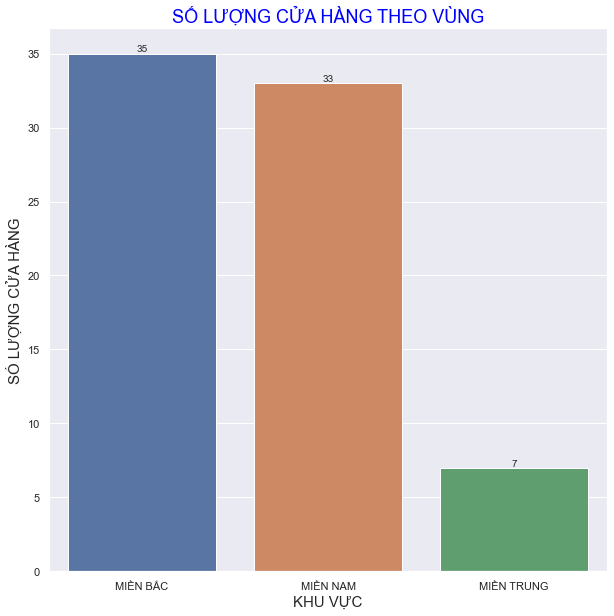

In [103]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.barplot(x='KHUVỰC', y='MãTT', data = df_store)

ax.set_title('SỐ LƯỢNG CỬA HÀNG THEO VÙNG',\
             fontdict = {'fontsize' : 18, 'color': 'blue','verticalalignment': 'baseline'})

ax.set_xlabel('KHU VỰC', fontdict = {'fontsize' : 15})
ax.set_ylabel('SỐ LƯỢNG CỬA HÀNG', fontdict = {'fontsize' : 15})

for i in ax.containers:
    ax.bar_label(i)

plt.show()

Second we will count in each region the distribution store in each country

In [104]:
df_store_1 = df.groupby(by=['KHUVỰC', 'CHINHÁNH'])['MãTT'].nunique()
df_store_1 = pd.DataFrame(df_store_1)
df_store_1 = df_store_1.reset_index()
df_store_1

,KHUVỰC,CHINHÁNH,MãTT
0,MIỀN BẮC,Hải Dương,1
1,MIỀN BẮC,Hải Phòng,3
2,MIỀN BẮC,Hà Nội,31
3,MIỀN NAM,An Giang,1
4,MIỀN NAM,Cần Thơ,2
5,MIỀN NAM,Hồ Chí Minh,23
6,MIỀN NAM,Kiên Giang,3
7,MIỀN NAM,Nha Trang,1
8,MIỀN NAM,Vĩnh Long,1
9,MIỀN NAM,Vũng Tàu,1


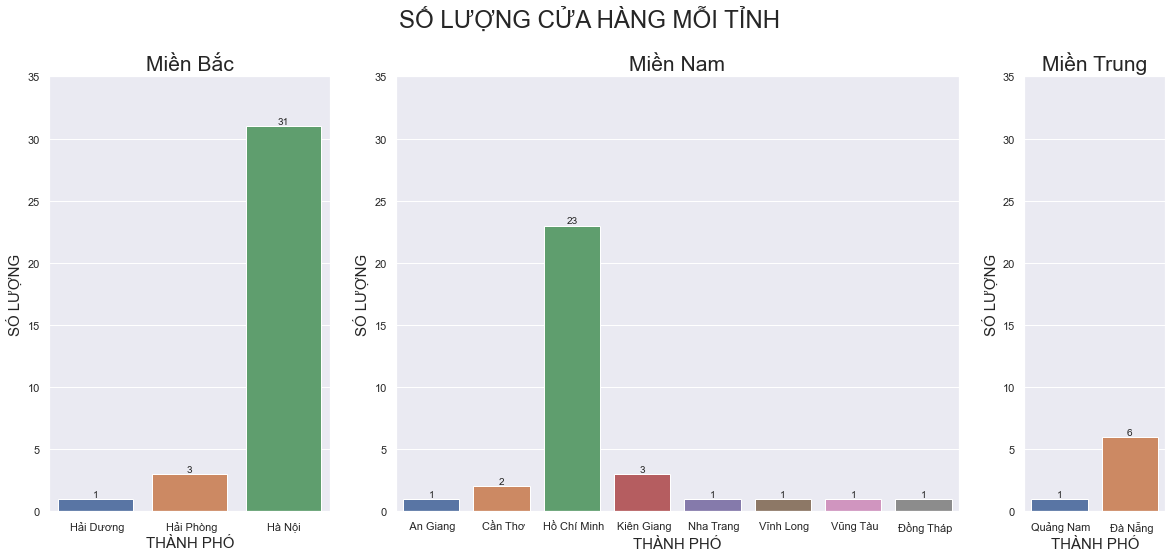

In [113]:
fig, ax = plt.subplots(1,3,figsize=(20,8), gridspec_kw={'width_ratios': [1, 2, 0.5]})
y_min = 0
y_max = 35

north_reg = df_store_1[df_store_1['KHUVỰC'] == 'MIỀN BẮC']
sns.barplot(x='CHINHÁNH', y='MãTT', data=north_reg, ax=ax[0])
ax[0].set_title('Miền Bắc', fontdict={'fontsize':21})
ax[0].set_ylim(y_min, y_max)
ax[0].set_xlabel('THÀNH PHỐ', fontdict={'fontsize':15})
ax[0].set_ylabel('SỐ LƯỢNG', fontdict={'fontsize':15})
for i in ax[0].containers:
    ax[0].bar_label(i)


south_reg = df_store_1[df_store_1['KHUVỰC'] == 'MIỀN NAM']
sns.barplot(x='CHINHÁNH', y='MãTT', data=south_reg, ax=ax[1])
ax[1].set_title('Miền Nam', fontdict={'fontsize':21})
ax[1].set_ylim(y_min, y_max)
ax[1].set_xlabel('THÀNH PHỐ', fontdict={'fontsize':15})
ax[1].set_ylabel('SỐ LƯỢNG', fontdict={'fontsize':15})
for i in ax[1].containers:
    ax[1].bar_label(i)

middle_reg = df_store_1[df_store_1['KHUVỰC'] == 'MIỀN TRUNG']
sns.barplot(x='CHINHÁNH', y='MãTT', data=middle_reg, ax=ax[2])
ax[2].set_title('Miền Trung', fontdict={'fontsize':21})
ax[2].set_ylim(y_min, y_max)
ax[2].set_xlabel('THÀNH PHỐ', fontdict={'fontsize':15})
ax[2].set_ylabel('SỐ LƯỢNG', fontdict={'fontsize':15})
for i in ax[2].containers:
    ax[2].bar_label(i)

fig.suptitle('SỐ LƯỢNG CỬA HÀNG MỖI TỈNH', fontsize=24, verticalalignment='center',\
             ha='center')
plt.show()

`SUMMARY`

1. The total of store is mainly located in __North__ and __South__

2. Hà Nội and Hồ Chí Minh - 2 countries have the most total stores in Vietnam => give our the chain focus on large countries (Hà Nội, Hồ Chí Minh, Đà Nẵng)
